In [255]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import fft,ifft
import soundfile as sf
import librosa

In [256]:
# A function to plot signal
def plot_signal(s, i):
    plt.figure()
    plt.plot(time_axis[i*hop_size:(i*hop_size+win_size)],s)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
# A function to plot spectrogram   
def plot_spectrogram(spec, fs, hop_size, in_dB=False, id='None'):
    
    # Convert time and frequency axes to sec and Hz
    time_axis = np.arange(spec.shape[1]) * hop_size / fs
    freq_axis = np.linspace(0, fs / 2, spec.shape[0])
    
    # Plot the spectrogram
    plt.imshow(spec, aspect='auto', origin='lower',
               cmap='jet')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Power (dB)' if in_dB else 'Amplitude')
    plt.title(f'Spectrogram, {id}, window size {hop_size*2:.2f}')
    plt.show()


### 1.  Implement a function to compute power spectrogram. (1 point)

In [257]:


print("Sample Rate (fs):", fs)
print("Audio Duration (seconds):", len(audio) / fs)

# Set parameters
win_size = int(0.1*fs)



def create_spectrogram(audio, win_size):
    
    
    # Read audio
    audio, fs = librosa.load(audio, sr=None)
    
    hop_size = win_size // 2 # b) Add overlap between consecutive signal frames.
    nfft = win_size
    nframes = int((len(audio) - win_size) / hop_size) + 1

    window = librosa.filters.get_window('hann', win_size)
    
    power_spectrogram = np.zeros((nfft // 2 + 1, nframes))

    # Loop through the frames
    for i in np.arange(0, nframes):
        # Select audio frame
        segment = audio[i*hop_size:i*hop_size+win_size]
        # a) Multiply each signal frame with a windowing function.
        segment_wind = segment * window
        
        # DFT spectrum
        spectrum = fft(segment_wind, n=nfft)
        # Select a frame and plot the spectrum with and without windowing.
        
        # c) Collect the power spectrum into a matrix.
        power_spectrum = np.abs(spectrum[:nfft // 2 + 1]) ** 2
        power_spectrogram[:,i] = power_spectrum

    return power_spectrogram, fs, hop_size
        
create_spectrogram('audio1.wav', win_size)

Sample Rate (fs): 44100
Audio Duration (seconds): 3.3


(array([[0.00000000e+00, 3.77651102e-01, 3.76667381e+00, ...,
         1.49732997e+01, 1.24828427e+01, 7.62160330e+00],
        [0.00000000e+00, 2.37137816e-01, 1.08541644e+00, ...,
         3.77555595e+00, 3.20609788e+00, 1.88910879e+00],
        [0.00000000e+00, 5.67834763e-02, 1.29125747e-02, ...,
         5.77411431e-05, 2.12123992e-03, 3.60660765e-03],
        ...,
        [0.00000000e+00, 1.77209174e-10, 1.10333942e-06, ...,
         1.56010485e-06, 2.72644316e-06, 7.52838136e-07],
        [0.00000000e+00, 6.19981605e-08, 5.59443858e-07, ...,
         3.63740354e-07, 3.24358947e-06, 8.81002072e-07],
        [0.00000000e+00, 1.32109053e-07, 4.61231705e-08, ...,
         4.43135157e-07, 2.87681630e-06, 1.45477233e-06]]),
 44100,
 2205)

#### Plot the matrix (power_spectrogram) as an image.

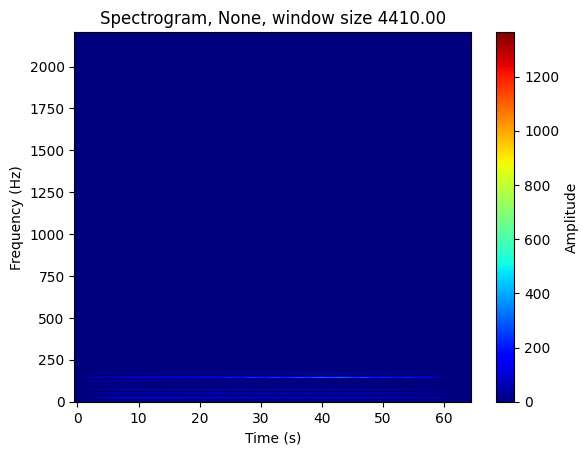

In [258]:
plot_spectrogram(power_spectrogram, fs, hop_size)

#### Plot the logarithm of the matrix.

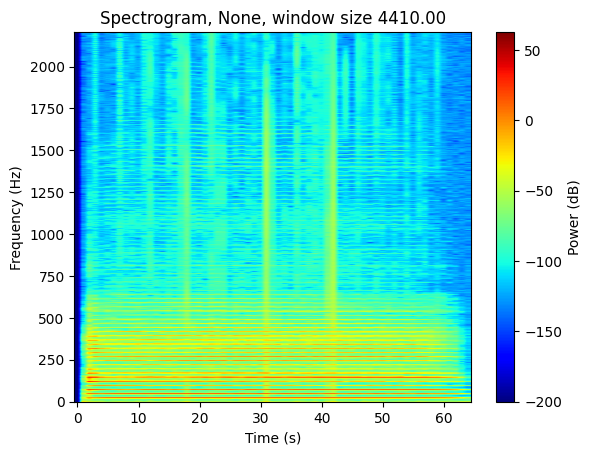

In [259]:
plot_spectrogram(20*np.log10(power_spectrogram + 1e-10), fs, hop_size, in_dB=True)

#### What differences do you observe?

The difference is clear: The logarithmic scale is much easier to read.

### 2.  Analyse the effect of window size on the spectrum. (1 point)

#### a) Calculate spectrogram with librosa and nfft=window size

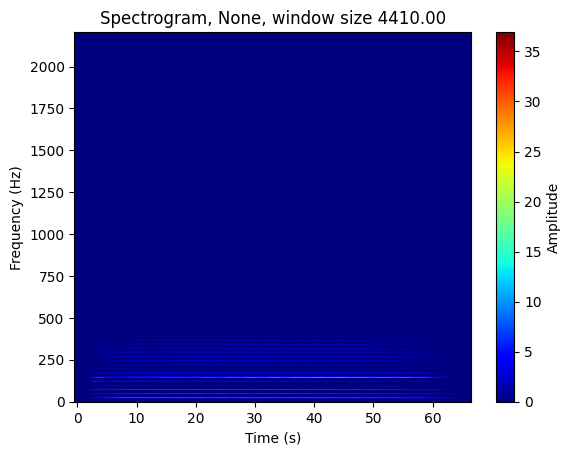

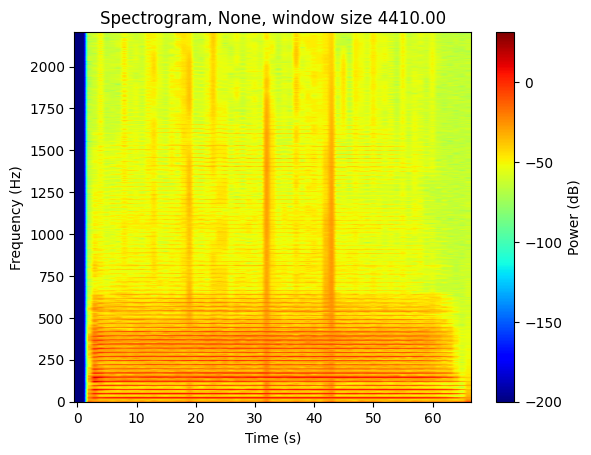

C:\Users\10001\AppData\Local\Temp\ipykernel_11904\3529853948.py:8: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  img = librosa.display.specshow(librosa.amplitude_to_db(stft.squeeze(), ref=np.max),


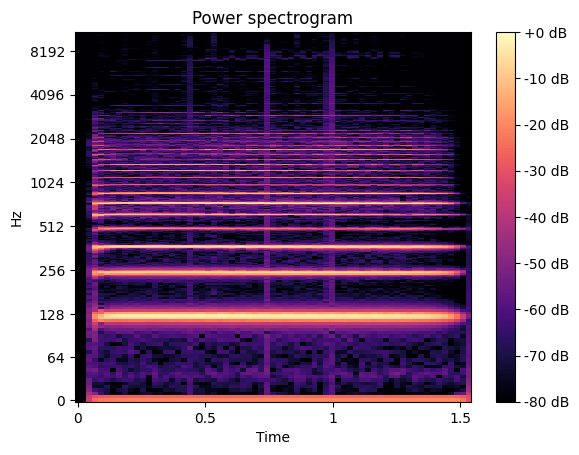

In [260]:
stft = librosa.stft(audio, n_fft=nfft, hop_length=hop_size, win_length=win_size, window='hann', center=True, dtype=None, pad_mode='constant', out=None)

plot_spectrogram(np.abs(stft), fs, hop_size)
plot_spectrogram(20*np.log10(np.abs(stft) + 1e-10), fs, hop_size, in_dB=True)

fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(stft.squeeze(), ref=np.max), 
                               y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")

#### Are there any differences from your own implementation?

There appear to be some differences, but they are small and may be because of
calculational inaccuracy and/or automatic color assignment by the spectrogram plot function

#### b) Apply your implementation with different window sizes (16ms, 32ms, 64ms and 128ms) to different signals (audio1, audio2 and synthetic sinusoids from exercise 1)

#### Note. You can define your implementation from problem 1 as a function and call it for each of the signals.

In [261]:
def create_sin_waves(amplitude, frequency, duration, sampling_rate, phase):
    '''
    A function to create sin wave
    '''
 
    # create a time array 
    t = np.linspace(0, duration, int(sampling_rate * duration), False) 
 
    # generate the sine wave 
    waveform = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    
    return waveform

In [262]:
def craps(filename, window_sizes):
    # Create and plot spectrogram
    for i, win_size in enumerate(window_sizes):
        spec, fs, hop = create_spectrogram(filename, win_size)
        plot_spectrogram(spec, fs, hop, id=filename)

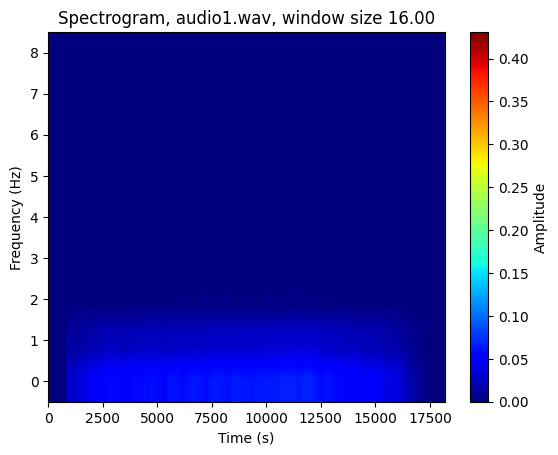

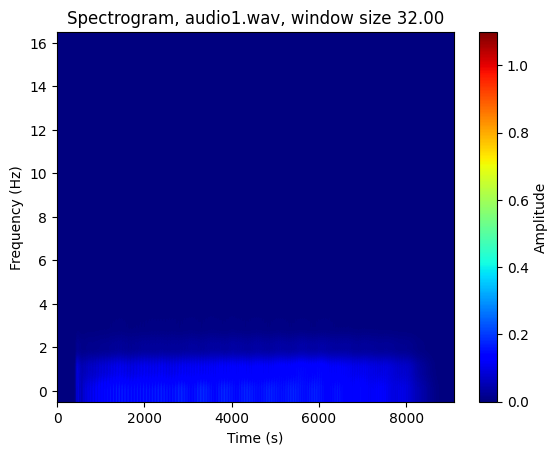

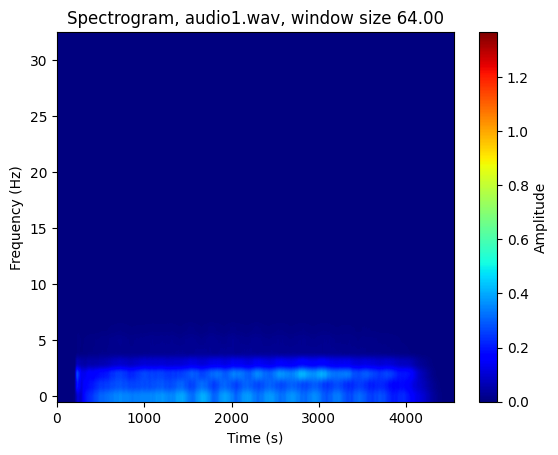

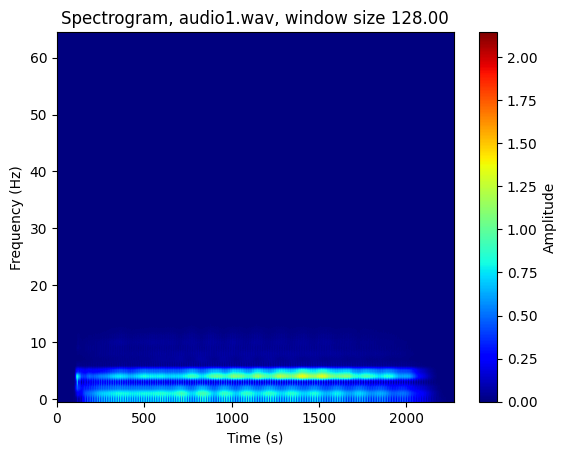

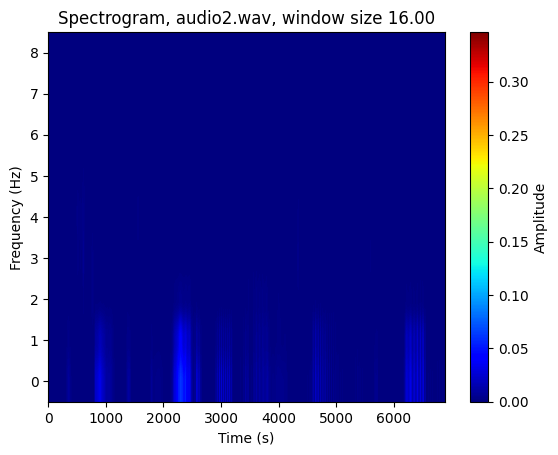

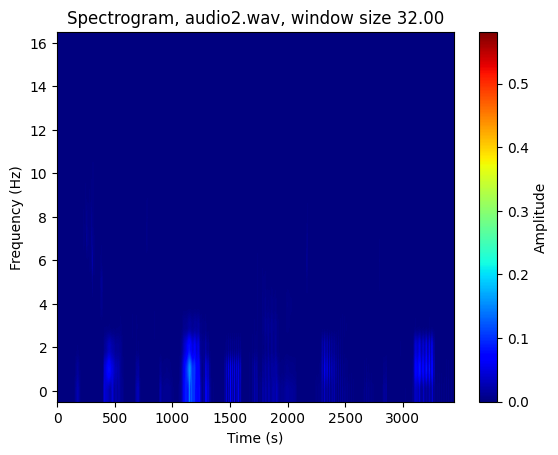

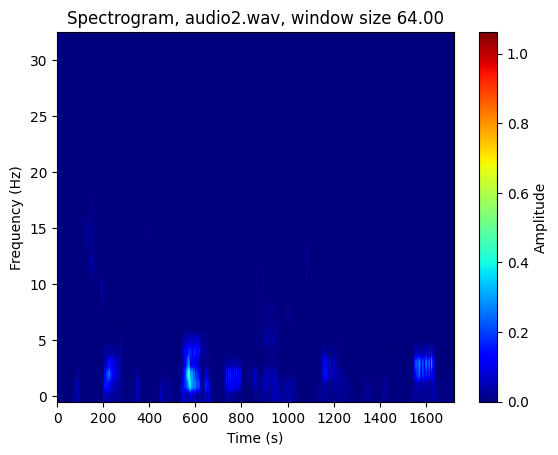

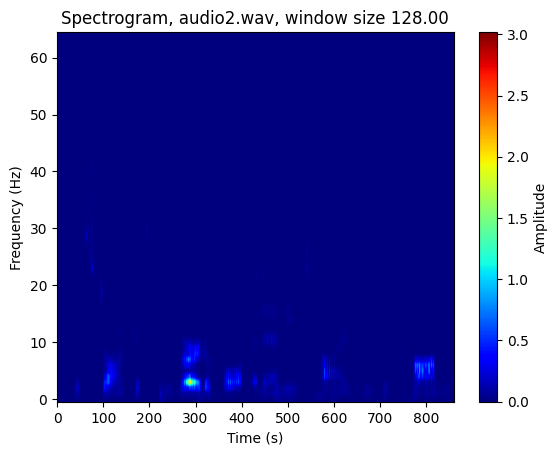

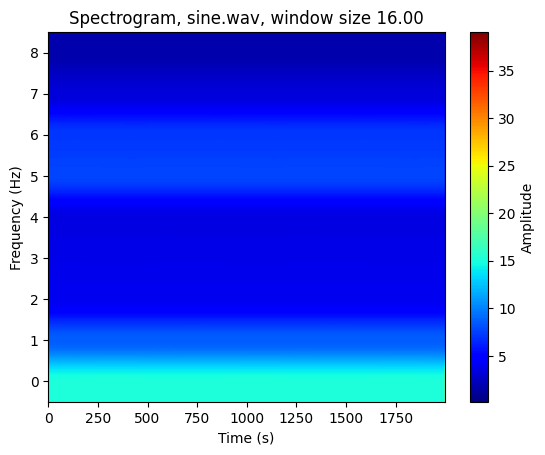

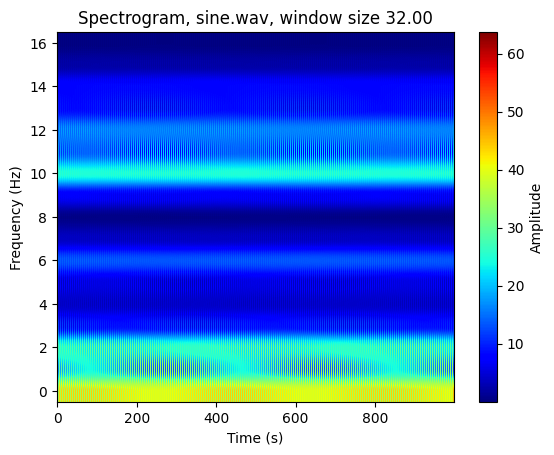

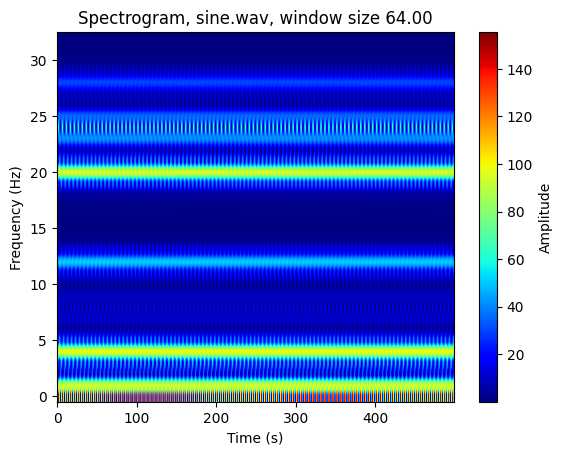

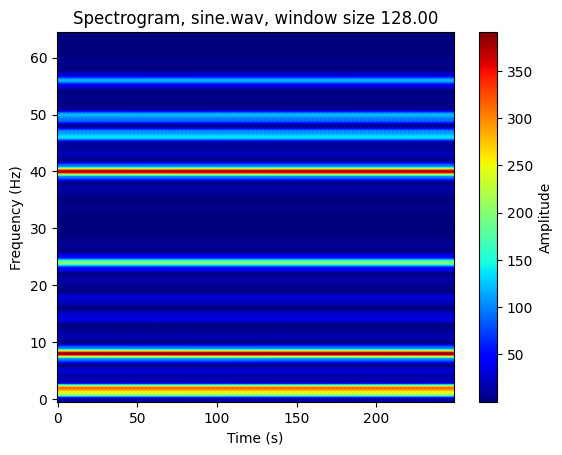

<Figure size 640x480 with 0 Axes>

In [263]:
# Synthetic sinusoids from exercise 1
length = 2 # seconds
sampling_rate = 8000 # Hz
sin0 = create_sin_waves(5, 100, length, sampling_rate, 0)
sin1 = create_sin_waves(6, 500, length, sampling_rate, 20)
sin2 = create_sin_waves(7, 1500, length, sampling_rate, 40)
sin3 = create_sin_waves(8, 2500, length, sampling_rate, 60)


sine = sin0 + sin1 + sin2 + sin3

sf.write('sine.wav', sine, sampling_rate)

window_sizes = [16, 32, 64, 128]
filenames = ['audio1.wav', 'audio2.wav', 'sine.wav']

for idx, filename in enumerate(filenames):
    # Create and plot (crap) spectrograms for each file in subplots
    specs = craps(filename, window_sizes)

plt.tight_layout()
plt.show()


#### c) What happens when the window size is increased?

As the window size is increased, the frequency resolution is better. However,
at the same time, temporal resolution suffers.

#### What analysis window lenght is best for each of the signal types?

According to the lecture notes, a good frame length for speech is 20 ms and
100 ms for music (flute)

### Bonus problem: Implement overlap-add reconstruction